In [1]:
using Revise
includet("shielding.jl")

#using .diatomic_jl.MoleculeTypes
using .shielding_jl
using PhysicalConstants.CODATA2018
a0 = BohrRadius.val

5.29177210903e-11

# Setting Up the Molecule

In [2]:
tester = generateMolecule(Na23Cs133, 3, 6)
H = generateHamiltonian(tester);

# Scanning Parameters

In [5]:
#Scanning Electric Field at high R making basis smaller for faster calculations
tester = generateMolecule(Na23Cs133, 3, 0)
H_Escan = generateHamiltonian(tester)

Escan = [2.365e5:1e2:2.37e5...]

sols_E = scan(H_Escan, 1e10, Escan);

In [ ]:
Eset = 2.65*1e5
#stateOI = State( [0.0, 0.0, 1.0, 1.0.0, 1.0, 1], H);
r_scan = [collect(100:40:500);collect(500:400:3000);collect(3000:1000:7000)].*a0
sols_R = scan(H, r_scan, Eset);

In [3]:
using JLD2
a = load("mytuple.jld2")
r_scan, sols_R = a["single_stored_object"];

## Plotting Utils

## Avoided Crossing from E-Field
### Demonstrates how you concatante plots with different states just pass in p

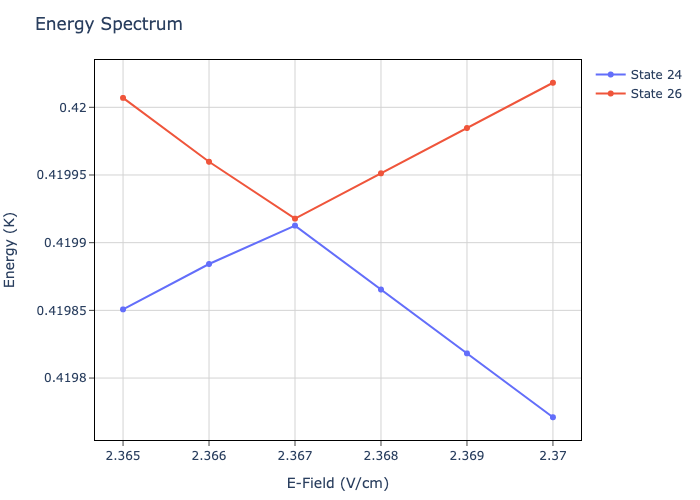

In [9]:
p = plotScan(H_Escan, sols_E, stateOI = [[0.0, 0.0], [0, 1.0], [0, 1.0]]) # stateOI = [[mL, L], [mN2, N2], [mN1, N1]]
p = plotScan(p, H_Escan, sols_E, stateOI = [[0.0, 0.0], [0, 2.0], [0, 0.0]])
p

## Demonstrates plot from R scan 
### shows you how to change properties of the plot
### shows you how to include multiple L's

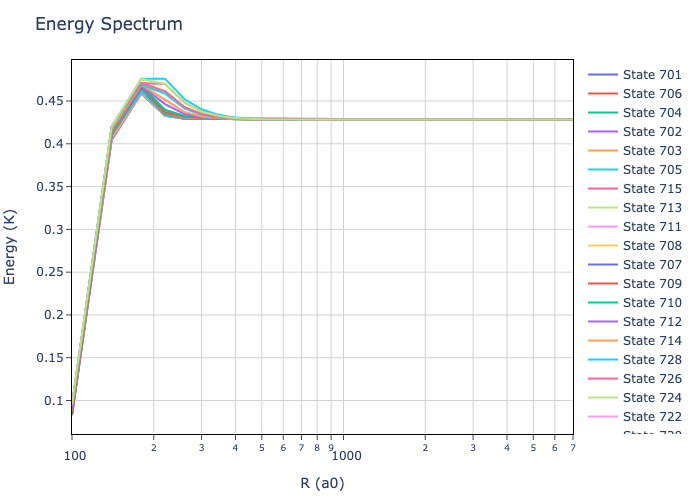

In [4]:
p = plotScan(H, sols_R, stateOI = [nothing, [0, 1.0], [0, 1.0]]) # stateOI = [[mL, L], [mN2, N2], [mN1, N1]]
relayout!(p, xaxis=attr(type= "log"))
p

# Extracting Data

In [6]:
energyVals = energies(sols_R)
stateOF = State([0, 0, 0, 1.0, 0, 1.0], H) #QM = [mL, L, mN2, N2, mN1, N1]
stateVec, adiabatOI = adiabats(sols_R, stateOF)

state: 701


(ComplexF64[-1.1251109366735745e-199 + 0.0im, 1.4920396454195733e-190 + 0.0im, 1.0307479456795981e-171 + 0.0im, -6.364396228134271e-162 + 0.0im, -3.6861880752176285e-159 + 0.0im, 1.3640589826555995e-157 + 0.0im, 3.375181167824001e-158 + 0.0im, 4.3435823993166354e-157 + 0.0im, 1.9784772330024345e-157 + 0.0im, -7.769756144615013e-159 + 0.0im  …  -1.2656528236018084e-161 + 0.0im, 3.697654403261404e-162 + 0.0im, -1.4167036084500515e-159 + 0.0im, -6.345241395672913e-161 + 0.0im, 1.5134696792008794e-161 + 0.0im, 2.5395818778230707e-162 + 0.0im, 3.8496725143053004e-162 + 0.0im, 7.1906057146857e-159 + 0.0im, 8.863637689787908e-158 + 0.0im, -7.886180621592587e-156 + 0.0im], [-345660.1071167478, -24072.149753901933, 30427.809280493413, 4307.516173529089, 877.2043503642781, 835.6769774560817, 583.8122257913346, 380.8871636050171, 259.00246157712536, 180.37365466664778  …  -5.1709674540907145, -2.339346795633901, -1.1531057400279678, -0.6193402644130401, -0.3558387763914652, -0.312456198153086, -0

# State searching Utils

In [7]:
stateOF = State([0, 0, 0, 1.0, 0, 1.0], H) #QM = [mL, L, mN2, N2, mN1, N1]
stateInd = findStateMax(stateOF, sols_R[end])

701